In [1]:
import xarray as xr 
import matplotlib.pyplot as plt
import torch 
import numpy as np

In [2]:
data_120 = xr.open_dataset('data/camx120hr_merged_20230717.nc')

data_96= xr.open_dataset('data/camxmet2d.delhi.20230717.96hours.nc')


In [3]:
data_120

<xarray.Dataset>
Dimensions:  (TSTEP: 120, LAY: 1, ROW: 80, COL: 80, VAR: 9, DATE-TIME: 2)
Dimensions without coordinates: TSTEP, LAY, ROW, COL, VAR, DATE-TIME
Data variables:
    P10      (TSTEP, LAY, ROW, COL) float32 ...
    P25      (TSTEP, LAY, ROW, COL) float32 ...
    TFLAG    (TSTEP, VAR, DATE-TIME) int32 ...
Attributes: (12/34)
    IOAPI_VERSION:  $Id: @(#) ioapi library version 3.0 $                    ...
    EXEC_ID:        ????????????????                                         ...
    FTYPE:          1
    CDATE:          2023197
    CTIME:          83911
    WDATE:          2023197
    ...             ...
    GDNAM:          ????????????????
    UPNAM:          CAMXMETOU       
    VAR-LIST:       P10             P25             
    FILEDESC:       I/O API formatted CAMx AVRG output                       ...
    HISTORY:        Mon Jul 17 08:45:22 2023: ncrcat camxout.2023.07.16.nc ca...
    NCO:            netCDF Operators version 4.9.1 (Homepage = http://nco.sf....

In [4]:
data_96

<xarray.Dataset>
Dimensions:     (TSTEP: 96, VAR: 14, DATE-TIME: 2, LAY: 1, ROW: 80, COL: 80)
Dimensions without coordinates: TSTEP, VAR, DATE-TIME, LAY, ROW, COL
Data variables: (12/15)
    TFLAG       (TSTEP, VAR, DATE-TIME) int32 ...
    TSURF_K     (TSTEP, LAY, ROW, COL) float32 ...
    SNOWEW_M    (TSTEP, LAY, ROW, COL) float32 ...
    SNOWAGE_HR  (TSTEP, LAY, ROW, COL) float32 ...
    PRATE_MMpH  (TSTEP, LAY, ROW, COL) float32 ...
    CLOUD_OD    (TSTEP, LAY, ROW, COL) float32 ...
    ...          ...
    SWSFC_WpM2  (TSTEP, LAY, ROW, COL) float32 ...
    SOLM_M3pM3  (TSTEP, LAY, ROW, COL) float32 ...
    CLDTOP_KM   (TSTEP, LAY, ROW, COL) float32 ...
    CAPE        (TSTEP, LAY, ROW, COL) float32 ...
    PBL_WRF_M   (TSTEP, LAY, ROW, COL) float32 ...
    PBL_YSU_M   (TSTEP, LAY, ROW, COL) float32 ...
Attributes: (12/33)
    IOAPI_VERSION:  $Id: @(#) ioapi library version 3.0 $                    ...
    EXEC_ID:        ????????????????                                         ...
    FTYPE:          1
    CDATE:          2023198
    CTIME:          73941
    WDATE:          2023198
    ...             ...
    VGLVLS:         [0. 0.]
    GDNAM:          ????????????????
    UPNAM:          CAMx2IOAPI      
    VAR-LIST:       TSURF_K         SNOWEW_M        SNOWAGE_HR      PRATE_MMp...
    FILEDESC:       I/O API formatted CAMx AVRG output                       ...
    HISTORY:

In [5]:
data_120['TFLAG'].values

array([[[2023197,       0],
        [2023197,       0],
        [2023197,       0],
        ...,
        [2023197,       0],
        [2023197,       0],
        [2023197,       0]],

       [[2023197,   10000],
        [2023197,   10000],
        [2023197,   10000],
        ...,
        [2023197,   10000],
        [2023197,   10000],
        [2023197,   10000]],

       [[2023197,   20000],
        [2023197,   20000],
        [2023197,   20000],
        ...,
        [2023197,   20000],
        [2023197,   20000],
        [2023197,   20000]],

       ...,

       [[2023201,  210000],
        [2023201,  210000],
        [2023201,  210000],
        ...,
        [2023201,  210000],
        [2023201,  210000],
        [2023201,  210000]],

       [[2023201,  220000],
        [2023201,  220000],
        [2023201,  220000],
        ...,
        [2023201,  220000],
        [2023201,  220000],
        [2023201,  220000]],

       [[2023201,  230000],
        [2023201,  230000],
        [2023201

In [6]:
data_96['TFLAG'].values

array([[[2023198,       0],
        [2023198,       0],
        [2023198,       0],
        ...,
        [2023198,       0],
        [2023198,       0],
        [2023198,       0]],

       [[2023198,   10000],
        [2023198,   10000],
        [2023198,   10000],
        ...,
        [2023198,   10000],
        [2023198,   10000],
        [2023198,   10000]],

       [[2023198,   20000],
        [2023198,   20000],
        [2023198,   20000],
        ...,
        [2023198,   20000],
        [2023198,   20000],
        [2023198,   20000]],

       ...,

       [[2023201,  210000],
        [2023201,  210000],
        [2023201,  210000],
        ...,
        [2023201,  210000],
        [2023201,  210000],
        [2023201,  210000]],

       [[2023201,  220000],
        [2023201,  220000],
        [2023201,  220000],
        ...,
        [2023201,  220000],
        [2023201,  220000],
        [2023201,  220000]],

       [[2023201,  230000],
        [2023201,  230000],
        [2023201

In [7]:
# wind speed at a hour 
X=[]

# corresponding PM25 next hour 
y=[]

for i in range(0,95):
    wind_speed = data_96['U10_MpS'][data_96['TSTEP']==i]
    wind_speed= wind_speed[0,:,:]
    wind_speed= wind_speed[0,:,:]
    X.append(wind_speed)
    p25= data_120['P25'][data_120['TSTEP']==i+1+24]
    p25= p25[0,:,:]
    p25= p25[0,:,:]
    y.append(p25)


In [8]:
X=  np.array(X)
y= np.array(y)

In [9]:
X.shape

(95, 80, 80)

In [10]:
y.shape

(95, 80, 80)

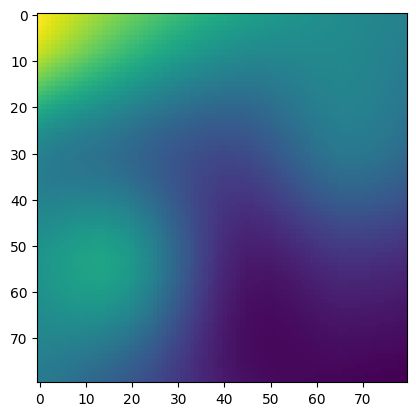

In [11]:
plt.imshow(X[0])

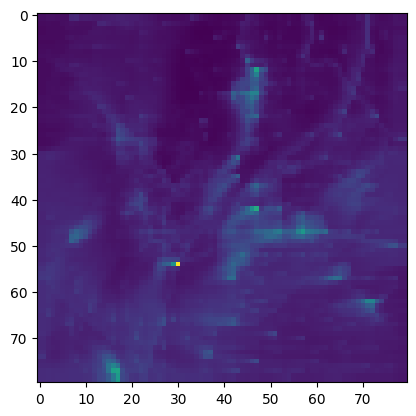

In [12]:
plt.imshow(y[0])

In [13]:
# import torch
import torch.nn as nn

class MyNetwork(nn.Module):
    def __init__(self):
        super(MyNetwork, self).__init__()
        
        # Define the layers
        self.flatten = nn.Flatten()  # Flatten the 2D input matrix
        self.fc1 = nn.Linear(80*80, 512)  # Fully connected layer 1
        self.relu = nn.ReLU()  # Activation function
        self.fc2 = nn.Linear(512, 80*80)  # Fully connected layer 2

    def forward(self, x):
        # Flatten the input
        x = self.flatten(x)
        
        # Forward pass through the fully connected layers
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        
        # Reshape the output to match the 2D matrix size
        x = x.view(-1, 80, 80)
        
        return x

# Instantiate the network
model = MyNetwork()

# Print the model architecture
print(model)


MyNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=6400, out_features=512, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=512, out_features=6400, bias=True)
)


In [14]:
import torch.utils.data as data

class CustomDataset(data.Dataset):
    def __init__(self, input_data, output_data):
        self.input_data = input_data
        self.output_data = output_data

    def __len__(self):
        return len(self.input_data)

    def __getitem__(self, index):
        input_sample = torch.Tensor(self.input_data[index])
        output_sample = torch.Tensor(self.output_data[index])
        return input_sample, output_sample


In [15]:
custom_dataset = CustomDataset(X, y)

In [16]:
batch_size = 16  # You can adjust the batch size as needed
train_loader = data.DataLoader(custom_dataset, batch_size=batch_size, shuffle=True)


In [28]:
# Assuming you have loaded your dataset into train_loader

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs=[]
losses=[]

num_epochs = 15
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    total_loss = 0.0
    
    for inputs, targets in train_loader:
        optimizer.zero_grad()  # Zero the gradients
        
        # Forward pass
        outputs = model(inputs)
        
        # Calculate the loss
        loss = criterion(outputs, targets)
        
        # Backpropagation
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    # Print the average loss for this epoch
    average_loss = total_loss / len(train_loader)
    epochs.append(epoch)
    losses.append(average_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}] Loss: {average_loss:.4f}")

# Save the trained model if needed
torch.save(model.state_dict(), 'model.pth')


Epoch [1/15] Loss: 236.4309
Epoch [2/15] Loss: 170.3037
Epoch [3/15] Loss: 146.3699
Epoch [4/15] Loss: 123.2424
Epoch [5/15] Loss: 114.4502
Epoch [6/15] Loss: 102.4852
Epoch [7/15] Loss: 95.3519
Epoch [8/15] Loss: 91.8000
Epoch [9/15] Loss: 81.8664
Epoch [10/15] Loss: 87.9070
Epoch [11/15] Loss: 82.7274
Epoch [12/15] Loss: 76.2043
Epoch [13/15] Loss: 75.2206
Epoch [14/15] Loss: 74.0148
Epoch [15/15] Loss: 73.5499


Text(0.5, 1.0, 'losses vs epochs')

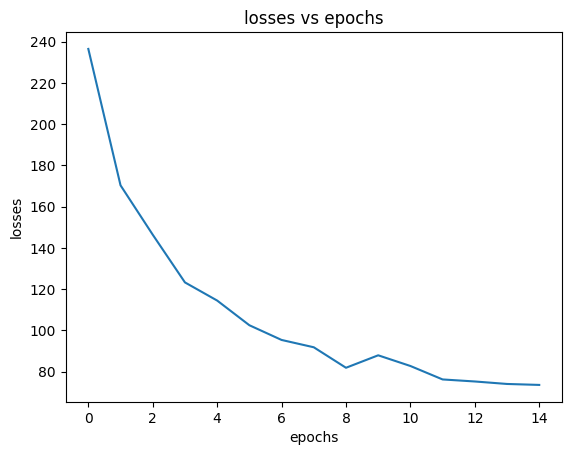

In [30]:
plt.plot(epochs,losses)
plt.xlabel('epochs')
plt.ylabel('losses')
plt.title('losses vs epochs')

In [18]:
# X_test=[]

data_120_test = xr.open_dataset('data/camx120hr_merged_20230718.nc')

data_96_test= xr.open_dataset('data/camxmet2d.delhi.20230718.96hours.nc')

In [19]:
X_test=[]
y_test=[]

for i in range(0,10):
    wind_speed = data_96_test['U10_MpS'][data_96_test['TSTEP']==i]
    wind_speed= wind_speed[0,:,:]
    wind_speed= wind_speed[0,:,:]
    X_test.append(wind_speed)
    p25= data_120_test['P25'][data_120_test['TSTEP']==i+1+24]
    p25= p25[0,:,:]
    p25= p25[0,:,:]
    y_test.append(p25)

In [20]:
X_test=  np.array(X_test)
y_test= np.array(y_test)

In [21]:
# Assuming you have already defined and initialized your model architecture
model = MyNetwork()  # Replace with your model class

# Load the trained model's state dictionary
model.load_state_dict(torch.load('model.pth'))


<All keys matched successfully>

In [22]:
new_input_tensor = torch.Tensor(X_test)

In [23]:
new_input_tensor.shape

torch.Size([10, 80, 80])

In [24]:
model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Disable gradient tracking during inference
    predictions = model(new_input_tensor)


In [25]:
predictions.shape

torch.Size([10, 80, 80])

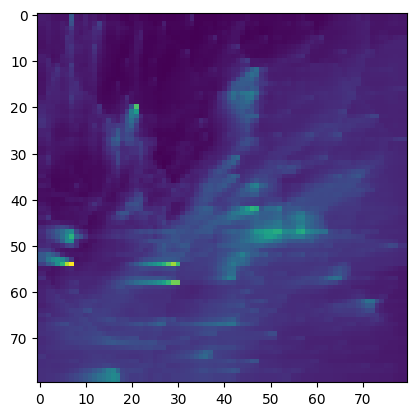

In [26]:
plt.imshow(y_test[0])

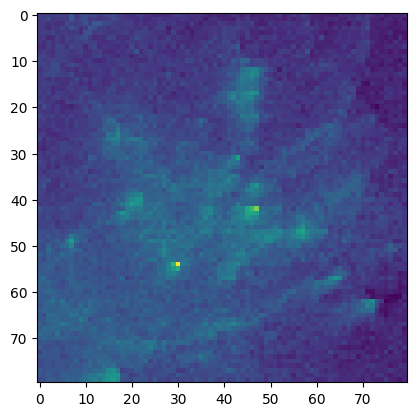

In [27]:
plt.imshow(predictions[0])

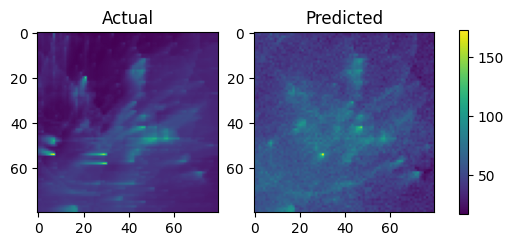

In [43]:
figure, axes = plt.subplots(nrows=1, ncols=2)
axes[0].imshow(y_test[0])
axes[1].imshow(predictions[0])
# plt.title('Actual vs Predicted PM25')
axes[0].set_title('Actual')
axes[1].set_title('Predicted')

# add a absolute common colorbar to both plots with same range

figure.colorbar(axes[0].imshow(y_test[0]), ax=axes.ravel().tolist(), shrink=0.5)
